In [13]:
import numpy as np
from spec_id import Analyze_Stack_avgage,Likelihood_contours, Make_model_list,Stack_spec_normwmean,Stack_model_normwmean,\
    Best_fit_model, Model_fit_stack_features,Stack_sim_model_normwmean
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d, interp2d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [14]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('lowmass_testlist.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

metal=np.array([ 0.0020, 0.0025, 0.0031, 0.0039, 0.0049, 0.0061,  0.0068,  0.0077,  0.0085,  0.0096,  0.0106,
                  0.012, 0.0132, 0.014,  0.0150,  0.0164, 0.018,  0.019,  0.021,  0.024, 0.027, 0.03])
bcmetal=np.array([0.0001, 0.0004, 0.004, 0.008, 0.02])
age=np.arange(.5,6.1,.1)
tau=[0,8.0,8.93,9.21,9.37,9.5,9.6,9.66,9.73,9.8,9.84,9.88,9.93,9.97,10.0]
ntau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

M,A=np.meshgrid(metal,age)
BM,BA=np.meshgrid(bcmetal,age)

In [12]:
%matplotlib inline

Best_fit_model('chidat/lmass_mar7_fit_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal = Analyze_Stack_avgage('chidat/lmass_mar7_fit_chidata.fits', np.array(tau), metal, age)
onesig, twosig = Likelihood_contours(age, metal, Pr)
levels = np.array([twosig, onesig])
plt.figure(figsize=[8, 8])
plt.contour(M, A, Pr, levels, colors='k', linewidths=2)
plt.contourf(M, A, Pr, 40, cmap=colmap)
plt.plot(bfmetal, bfage, 'cp', label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage, np.round(bfmetal / 0.019, 2)))
plt.xticks([0, .005, .01, .015, .02, .025, .03], np.round(np.array([0, .005, .01, .015, .02, .025, .03]) / 0.02, 2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

Best_fit_model('chidat/lmass_mar8_nt_fit_chidata.fits',metal,age,ntau)
Pr, bfage, bfmetal = Analyze_Stack_avgage('chidat/lmass_mar8_nt_fit_chidata.fits', np.array(ntau), metal, age,age_conv='tau_scale_ntau.dat')
onesig, twosig = Likelihood_contours(age, metal, Pr)
levels = np.array([twosig, onesig])
plt.figure(figsize=[8, 8])
plt.contour(M, A, Pr, levels, colors='k', linewidths=2)
plt.contourf(M, A, Pr, 40, cmap=colmap)
plt.plot(bfmetal, bfage, 'cp', label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage, np.round(bfmetal / 0.019, 2)))
plt.xticks([0, .005, .01, .015, .02, .025, .03], np.round(np.array([0, .005, .01, .015, .02, .025, .03]) / 0.02, 2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

0.019 1.3 0


KeyboardInterrupt: 

0.019 1.3 0
Best fit model is 1.3 Gyr and 0.019 Z


[  13.9055053   191.53712135]

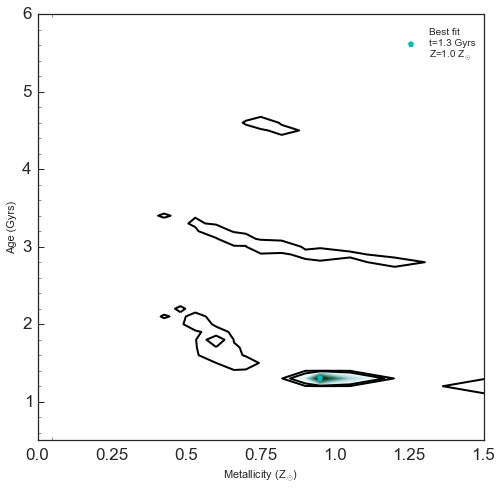

0.03 1.3 8.0
Best fit model is 5.2 Gyr and 0.002 Z


[  13.9055053   191.53712135]

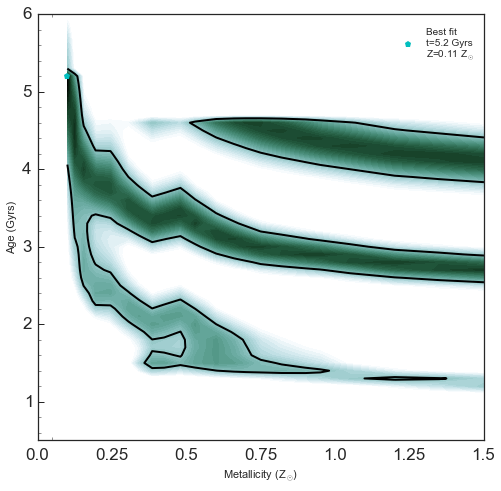

[  16.31369817  105.13272153]
[[ 8 17]]


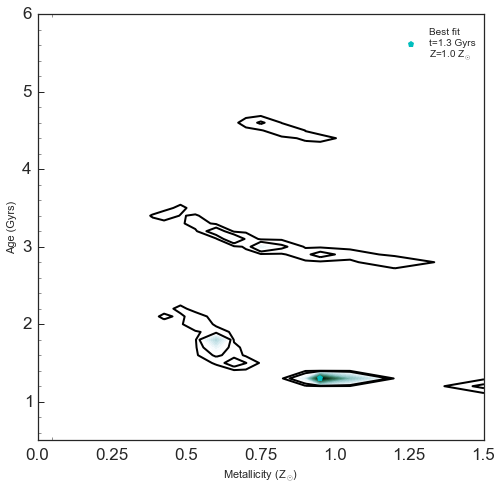

In [ ]:
# Model_fit_stack_normwmean_features(speclist,tau,metal,age,rshift,ids,np.arange(3450, 5300, 10),'lmass_mar8_feat_fit',
#                           'lmass_mar7_spec',res=10,fsps=True)
bfm,bfa,bft=Best_fit_model('chidat/lmass_mar8_feat_fit_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar8_feat_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([30.90866543, 322.16339735])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

# Model_fit_stack_UVB_normwmean(speclist,tau,metal,age,rshift,ids,np.arange(3450,5300,10),'lmass_mar8_uvb_fit',
#                           'lmass_mar7_spec',res=10,fsps=True)
bfm,bfa,bft=Best_fit_model('chidat/lmass_mar8_uvb_fit_chidata.fits',metal,age,tau)
Pru, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar8_uvb_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pru)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([6.18360513, 15.93924044])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pru,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pru,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()
# 
Prt=Pr*Pru
Age=[]
for i in range(len(Prt)):
    Age.append(np.trapz(Prt[i],metal))
    
C=np.trapz(Age,age)
Prt/=C

onesig,twosig=Likelihood_contours(age,metal,Prt)
levels=np.array([twosig,onesig])
print levels
x=np.argwhere(Prt==np.max(Prt))

print x
bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

# levels=np.array([31.62749269, 310.47171728])

plt.figure(figsize=[8,8])
plt.contour(M,A,Prt,levels,colors='k',linewidths=2)
plt.contourf(M,A,Prt,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

0.019 1.3 0
Best fit model is 1.3 Gyr and 0.019 Z


[  3.77034555  81.75696667]

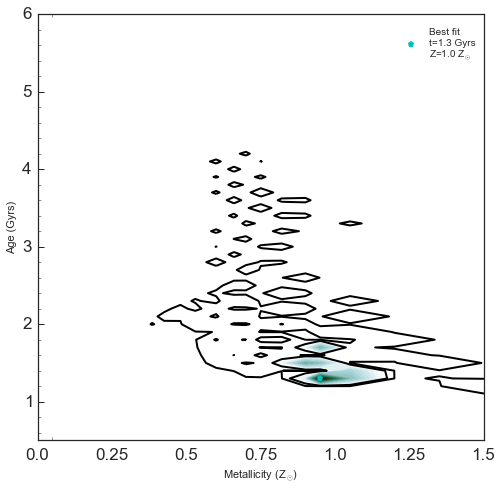

0.03 1.3 8.0
Best fit model is 4.9 Gyr and 0.002 Z


[ 5.80751048  9.99987294]

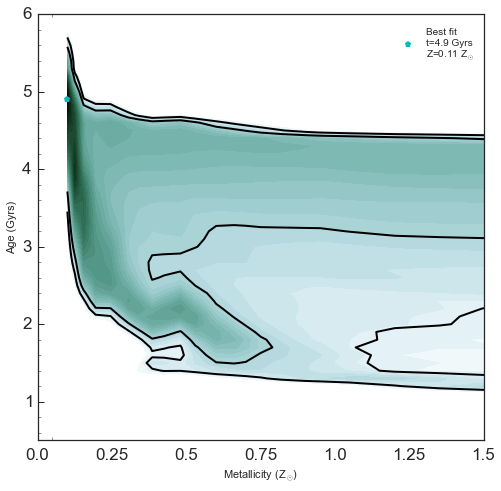

[  3.41370402  78.51519257]
[[ 8 17]]


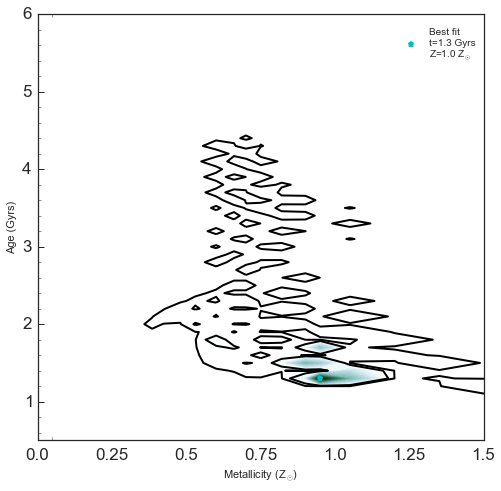

In [ ]:
# Model_fit_stack_normwmean_features(speclist,ntau,metal,age,rshift,ids,np.arange(3450, 5300, 10),'lmass_mar9_nt_feat_fit',
#                           'lmass_mar8_nt_spec',res=10,fsps=True)
bfm,bfa,bft=Best_fit_model('chidat/lmass_mar9_nt_feat_fit_chidata.fits',metal,age,ntau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar9_nt_feat_fit_chidata.fits',np.array(ntau),
                                         metal,age,age_conv='tau_scale_ntau.dat')
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([30.90866543, 322.16339735])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

# Model_fit_stack_UVB_normwmean(speclist,ntau,metal,age,rshift,ids,np.arange(3450,5300,10),'lmass_mar9_nt_uvb_fit',
#                           'lmass_mar8_nt_spec',res=10,fsps=True)
bfm,bfa,bft=Best_fit_model('chidat/lmass_mar9_nt_uvb_fit_chidata.fits',metal,age,ntau)
Pru, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar9_nt_uvb_fit_chidata.fits',np.array(ntau),
                                          metal,age,age_conv='tau_scale_ntau.dat')
onesig,twosig=Likelihood_contours(age,metal,Pru)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([6.18360513, 15.93924044])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pru,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pru,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()
# 
Prt=Pr*Pru
Age=[]
for i in range(len(Prt)):
    Age.append(np.trapz(Prt[i],metal))
    
C=np.trapz(Age,age)
Prt/=C

onesig,twosig=Likelihood_contours(age,metal,Prt)
levels=np.array([twosig,onesig])
print levels
x=np.argwhere(Prt==np.max(Prt))

print x
bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

# levels=np.array([31.62749269, 310.47171728])

plt.figure(figsize=[8,8])
plt.contour(M,A,Prt,levels,colors='k',linewidths=2)
plt.contourf(M,A,Prt,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

0.002 4.0 0
Best fit model is 5.0 Gyr and 0.002 Z

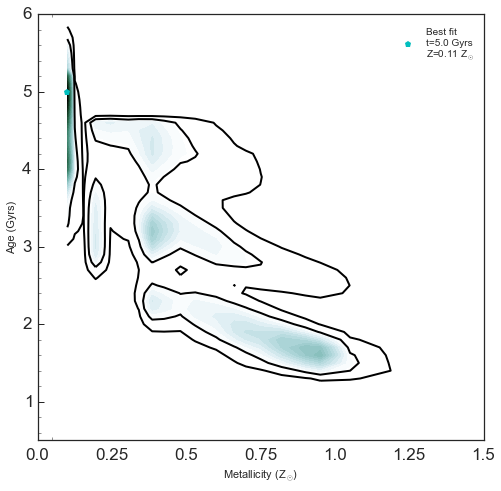

0.002 4.0 0
Best fit model is 5.0 Gyr and 0.002 Z


[  4.65674636  42.15580916]

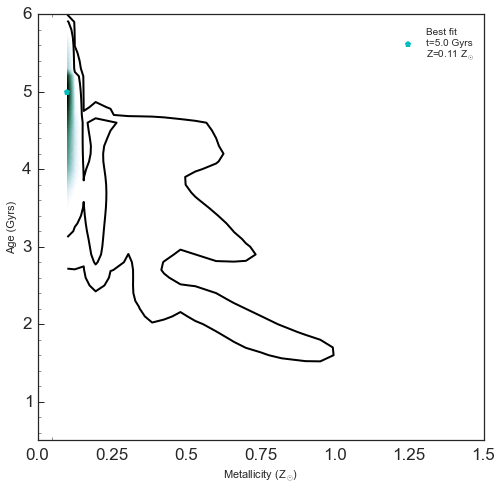

0.03 1.3 8.0
Best fit model is 5.2 Gyr and 0.002 Z


[  4.65674636  42.15580916]

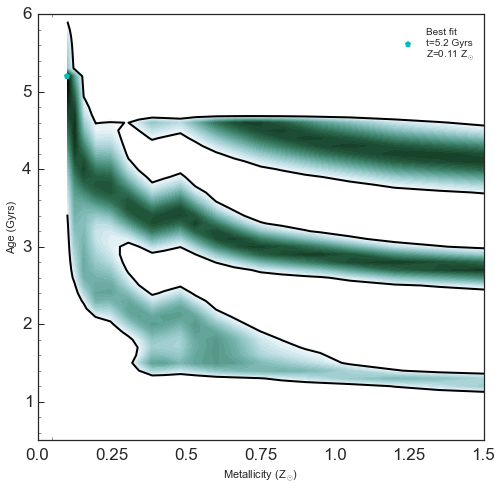

[   7.18462249  101.03375379]
[[45  0]]


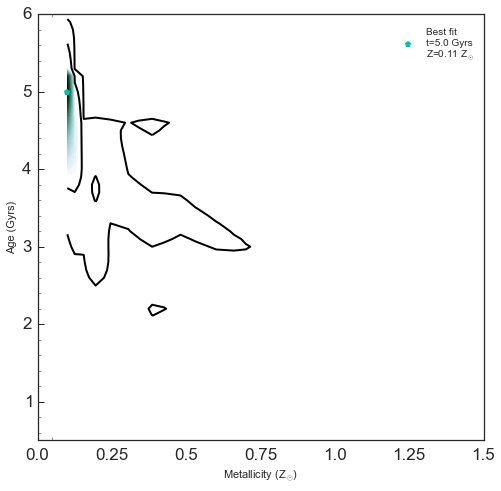

In [ ]:
%matplotlib inline

Best_fit_model('chidat/lmass_mar8_nc_fit_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal = Analyze_Stack_avgage('chidat/lmass_mar8_nc_fit_chidata.fits', np.array(tau), metal, age)
onesig, twosig = Likelihood_contours(age, metal, Pr)
levels = np.array([twosig, onesig])
plt.figure(figsize=[8, 8])
plt.contour(M, A, Pr, levels, colors='k', linewidths=2)
plt.contourf(M, A, Pr, 40, cmap=colmap)
plt.plot(bfmetal, bfage, 'cp', label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage, np.round(bfmetal / 0.019, 2)))
plt.xticks([0, .005, .01, .015, .02, .025, .03], np.round(np.array([0, .005, .01, .015, .02, .025, .03]) / 0.02, 2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

Model_fit_stack_features(speclist,tau,metal,age,rshift,ids,np.arange(3450, 5300, 10),'lmass_mar9_nc_feat_fit',
                          'lmass_mar8_nc_spec',res=10,fsps=True)
bfm,bfa,bft=Best_fit_model('chidat/lmass_mar9_nc_feat_fit_chidata.fits',metal,age,tau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar9_nc_feat_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([30.90866543, 322.16339735])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

bfm,bfa,bft=Best_fit_model('chidat/lmass_mar8_uvb_fit_chidata.fits',metal,age,tau)
Pru, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar8_uvb_fit_chidata.fits',np.array(tau),metal,age)
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([6.18360513, 15.93924044])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pru,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pru,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()
# 
Prt=Pr*Pru
Age=[]
for i in range(len(Prt)):
    Age.append(np.trapz(Prt[i],metal))
    
C=np.trapz(Age,age)
Prt/=C

onesig,twosig=Likelihood_contours(age,metal,Prt)
levels=np.array([twosig,onesig])
print levels
x=np.argwhere(Prt==np.max(Prt))

print x
bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

# levels=np.array([31.62749269, 310.47171728])

plt.figure(figsize=[8,8])
plt.contour(M,A,Prt,levels,colors='k',linewidths=2)
plt.contourf(M,A,Prt,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

0.002 4.0 0
Best fit model is 4.8 Gyr and 0.002 Z

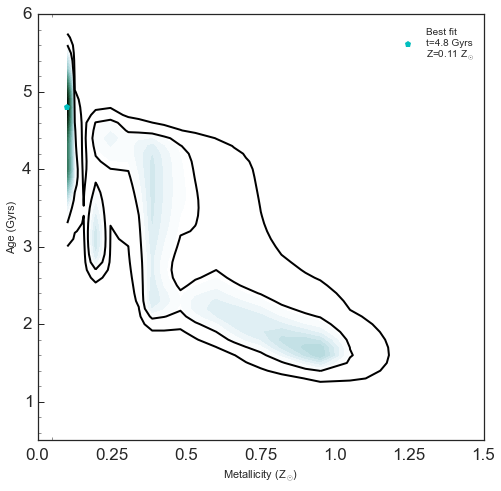

0.002 4.0 0
Best fit model is 4.8 Gyr and 0.002 Z


[  4.82724429  41.37637963]

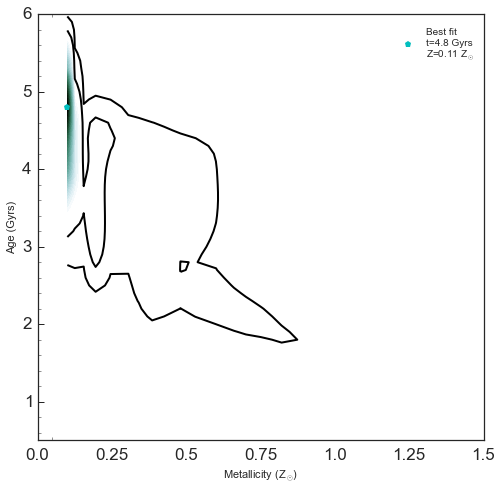

0.03 1.3 8.0
Best fit model is 4.9 Gyr and 0.002 Z


[  4.82724429  41.37637963]

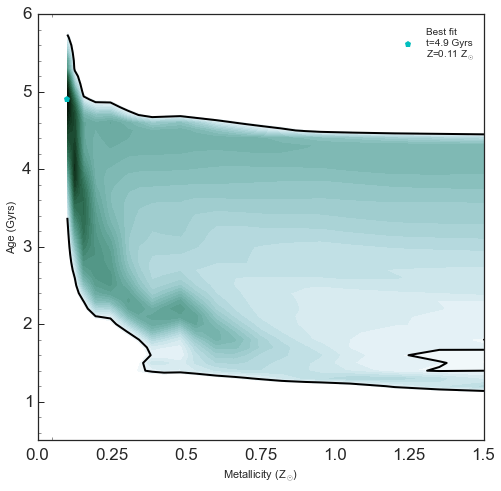

[  5.37499938  70.642849  ]
[[43  0]]


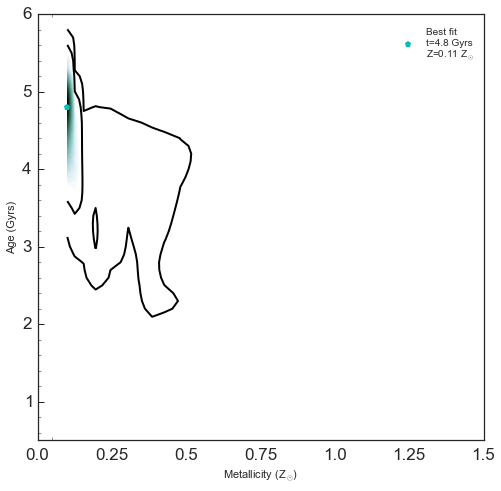

In [ ]:
Best_fit_model('chidat/lmass_mar8_ncnt_fit_chidata.fits',metal,age,ntau)
Pr, bfage, bfmetal = Analyze_Stack_avgage('chidat/lmass_mar8_ncnt_fit_chidata.fits', np.array(ntau), metal, age,age_conv='tau_scale_ntau.dat')
onesig, twosig = Likelihood_contours(age, metal, Pr)
levels = np.array([twosig, onesig])
plt.figure(figsize=[8, 8])
plt.contour(M, A, Pr, levels, colors='k', linewidths=2)
plt.contourf(M, A, Pr, 40, cmap=colmap)
plt.plot(bfmetal, bfage, 'cp', label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage, np.round(bfmetal / 0.019, 2)))
plt.xticks([0, .005, .01, .015, .02, .025, .03], np.round(np.array([0, .005, .01, .015, .02, .025, .03]) / 0.02, 2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

# Model_fit_stack_features(speclist,ntau,metal,age,rshift,ids,np.arange(3450, 5300, 10),'lmass_mar9_ncnt_feat_fit',
#                           'lmass_mar8_ncnt_spec',res=10,fsps=True)
bfm,bfa,bft=Best_fit_model('chidat/lmass_mar9_ncnt_feat_fit_chidata.fits',metal,age,ntau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar9_ncnt_feat_fit_chidata.fits',np.array(ntau),
                                         metal,age,age_conv='tau_scale_ntau.dat')
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([30.90866543, 322.16339735])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

bfm,bfa,bft=Best_fit_model('chidat/lmass_mar9_nt_uvb_fit_chidata.fits',metal,age,ntau)
Pru, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar9_nt_uvb_fit_chidata.fits',np.array(ntau),
                                          metal,age,age_conv='tau_scale_ntau.dat')
onesig,twosig=Likelihood_contours(age,metal,Pru)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([6.18360513, 15.93924044])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pru,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pru,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()
# 
Prt=Pr*Pru
Age=[]
for i in range(len(Prt)):
    Age.append(np.trapz(Prt[i],metal))
    
C=np.trapz(Age,age)
Prt/=C

onesig,twosig=Likelihood_contours(age,metal,Prt)
levels=np.array([twosig,onesig])
print levels
x=np.argwhere(Prt==np.max(Prt))

print x
bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

# levels=np.array([31.62749269, 310.47171728])

plt.figure(figsize=[8,8])
plt.contour(M,A,Prt,levels,colors='k',linewidths=2)
plt.contourf(M,A,Prt,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

0.019 1.3 0
Best fit model is 1.3 Gyr and 0.019 Z


[  3.77034555  81.75696667]

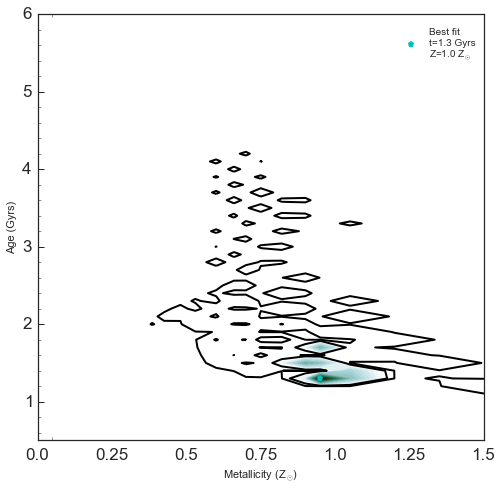

0.019 1.4 8.0
Best fit model is 1.2 Gyr and 0.027 Z


[  7.5879999   67.48721125]

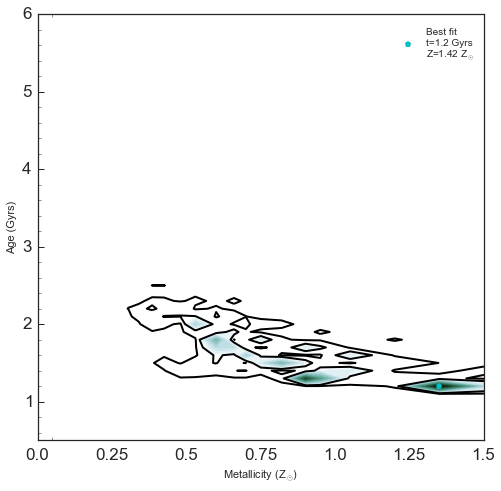

[  24.43031094  228.01623546]
[[ 8 17]]


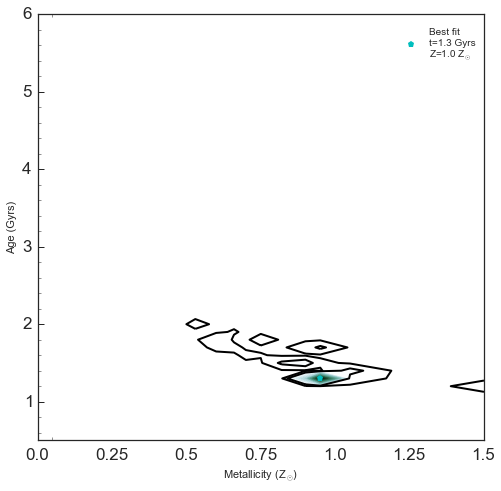

In [ ]:
bfm,bfa,bft=Best_fit_model('chidat/lmass_mar9_nt_feat_fit_chidata.fits',metal,age,ntau)
Pr, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar9_nt_feat_fit_chidata.fits',np.array(ntau),
                                         metal,age,age_conv='tau_scale_ntau.dat')
onesig,twosig=Likelihood_contours(age,metal,Pr)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([30.90866543, 322.16339735])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pr,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pr,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

Model_fit_stack_normwmean_cont(speclist,ntau,metal,age,rshift,ids,np.arange(3450,5300,10),'lmass_mar9_nt_cont_fit',
                          'lmass_mar8_nt_spec',res=10,fsps=True)

bfm,bfa,bft=Best_fit_model('chidat/lmass_mar9_nt_cont_fit_chidata.fits',metal,age,ntau)
Pru, bfage, bfmetal= Analyze_Stack_avgage('chidat/lmass_mar9_nt_cont_fit_chidata.fits',np.array(ntau),
                                          metal,age,age_conv='tau_scale_ntau.dat')
onesig,twosig=Likelihood_contours(age,metal,Pru)
levels=np.array([twosig,onesig])
print levels
# levels=np.array([6.18360513, 15.93924044])

plt.figure(figsize=[8,8])
plt.contour(M,A,Pru,levels,colors='k',linewidths=2)
plt.contourf(M,A,Pru,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()
# 
Prt=Pr*Pru
Age=[]
for i in range(len(Prt)):
    Age.append(np.trapz(Prt[i],metal))
    
C=np.trapz(Age,age)
Prt/=C

onesig,twosig=Likelihood_contours(age,metal,Prt)
levels=np.array([twosig,onesig])
print levels
x=np.argwhere(Prt==np.max(Prt))

print x
bfmetal,bfage=[metal[x[0][1]],age[x[0][0]]]

# levels=np.array([31.62749269, 310.47171728])

plt.figure(figsize=[8,8])
plt.contour(M,A,Prt,levels,colors='k',linewidths=2)
plt.contourf(M,A,Prt,40,cmap=colmap)
plt.plot(bfmetal,bfage,'cp',label='\nBest fit\nt=%s Gyrs\nZ=%s Z$_\odot$' % (bfage,np.round(bfmetal/0.019,2)))
plt.xticks([0,.005,.01,.015,.02,.025,.03],np.round(np.array([0,.005,.01,.015,.02,.025,.03])/0.02,2))
plt.tick_params(axis='both', which='major', labelsize=17)
plt.gcf().subplots_adjust(bottom=0.16)
plt.minorticks_on()
plt.xlabel('Metallicity (Z$_\odot$)')
plt.ylabel('Age (Gyrs)')
plt.legend()
plt.show()
plt.close()

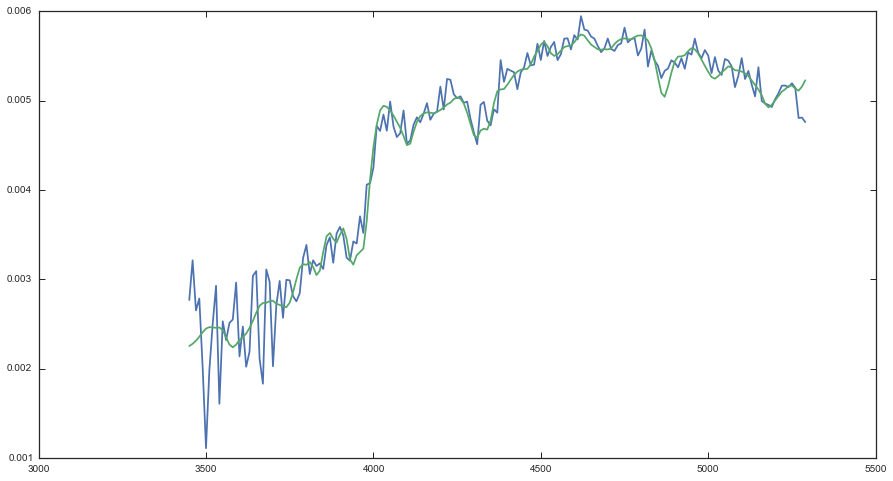

In [ ]:
wv,fl,er=Stack_spec_normwmean(speclist,rshift,np.arange(3450,5300,10))
mlist=Make_model_list(ids,0.019, 1.4, 8.0,rshift)
mwv,mfl=Stack_model_normwmean(speclist,mlist,rshift,np.arange(3450,5300,10))

plt.figure(figsize=[15,8])
plt.plot(wv,fl)
plt.plot(mwv,mfl)
plt.show()
plt.close()

In [ ]:
def Analyze_Stack_avgage2(chifits, tau, metal, age,age_conv='tau_scale_nage.dat'):
    ####### Read in file
    dat = fits.open(chifits)
    chi = []
    for i in range(len(metal)):
        chi.append(dat[i + 1].data)
    chi = np.transpose(chi)

    scale = Readfile(age_conv, 1)

    newchi = []
    for i in range(len(chi)):
        if i == 0:
            iframe = chi[i]
        else:
            iframe = interp2d(metal, scale[i], chi[i])(metal, age)
        newchi.append(iframe)
    newchi = np.transpose(newchi)

    ####### Create normalize probablity marginalized over tau
    prob = np.array(Norm_P_stack(tau, metal, age, newchi)).astype(np.float128)

    ####### get best fit values
    [idmax] = np.argwhere(prob == np.max(prob))
    print 'Best fit model is %s Gyr and %s Z' % (age[idmax[1]], metal[idmax[0]])

    return prob.T, age[idmax[1]], metal[idmax[0]]

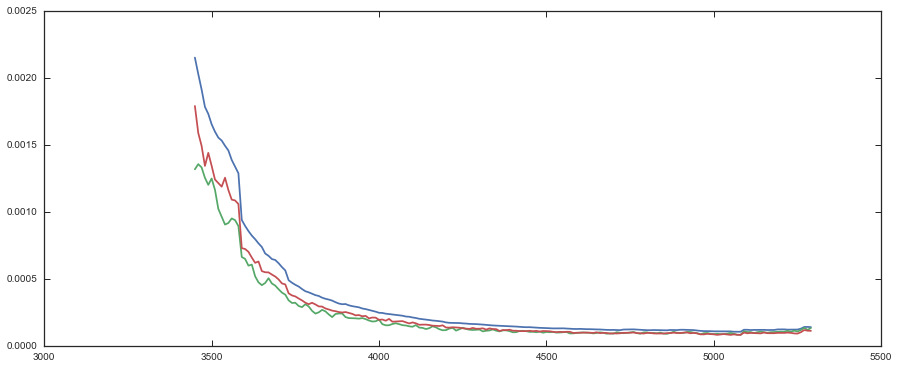

In [19]:
%matplotlib inline

wv,fl,er=Stack_spec_normwmean(speclist,rshift,np.arange(3450,5300,10))
mlist=Make_model_list(ids,0.0132,3.0,0,rshift)

R1=[]
R2=[]
for xx in range(1000):
    mwv2,mfl2=Stack_model_normwmean(speclist,mlist,rshift,np.arange(3450,5300,10))
    mfl3=mfl2 + np.random.normal(0,er)
    R2.append(mfl2-mfl3)
    mwv1,mfl1,mer1=Stack_sim_model_normwmean(speclist,mlist,rshift,np.arange(3450,5300,10))
    R1.append(mfl2-mfl1)
res1=np.mean(np.abs(R1).T,axis=1)
res2=np.mean(np.abs(R2).T,axis=1)
    
plt.figure(figsize=[15,6])
plt.plot(mwv1,er)
plt.plot(mwv1,res1)
plt.plot(mwv1,res2)
plt.show()
plt.close()